In [0]:
%sql
CREATE DATABASE IF NOT EXISTS gold;

In [0]:
%sql
CREATE OR REPLACE TABLE gold.monthly_trends AS
SELECT
    YEAR(creation_timestamp) AS year,
    MONTH(creation_timestamp) AS month,
    DATE_TRUNC('month', creation_timestamp) AS month_start,
    COUNT(question_id) AS total_questions,
    AVG(view_count) AS avg_views,
    AVG(answer_count) AS avg_answers,
    SUM(CASE WHEN is_answered THEN 1 ELSE 0 END) AS answered_questions
FROM silver.questions
GROUP BY
    YEAR(creation_timestamp),
    MONTH(creation_timestamp),
    DATE_TRUNC('month', creation_timestamp)
ORDER BY
    year, month;


num_affected_rows,num_inserted_rows


In [0]:
%sql SELECT * FROM gold.monthly_trends LIMIT 10

year,month,month_start,total_questions,avg_views,avg_answers,answered_questions
2025,2,2025-02-01T00:00:00Z,12457,160.74841454603836,0.7949747130127639,5088
2025,3,2025-03-01T00:00:00Z,19114,130.4645286177671,0.7798995500680129,7827
2025,4,2025-04-01T00:00:00Z,14340,123.48960948396095,0.7971408647140865,6019
2025,5,2025-05-01T00:00:00Z,11995,116.86302626094206,0.8208420175072947,5212
2025,6,2025-06-01T00:00:00Z,9562,113.22871784145576,0.822422087429408,4132
2025,7,2025-07-01T00:00:00Z,8087,105.98219364412019,0.8449363175466799,3718
2025,8,2025-08-01T00:00:00Z,6128,98.0197454308094,0.8371409921671018,2847
2025,9,2025-09-01T00:00:00Z,7860,77.62735368956743,0.6229007633587786,2582
2025,10,2025-10-01T00:00:00Z,457,33.08533916849015,0.3238512035010941,63


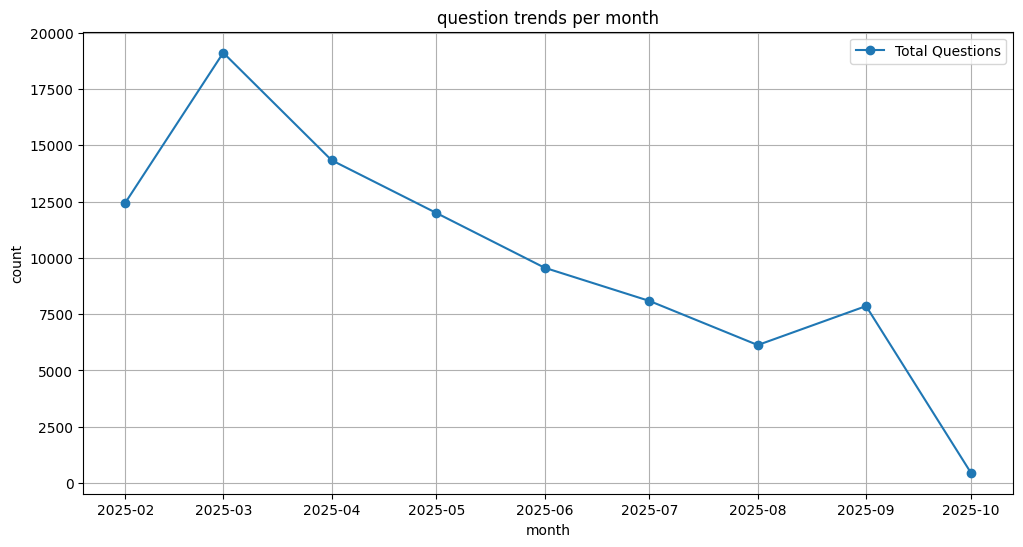

In [0]:
import matplotlib.pyplot as plt

# load into spark dataframe and convert to pandas for plotting
gold_monthly_trends = spark.table("gold.monthly_trends")
pdf = gold_monthly_trends.toPandas()

pdf = pdf.sort_values("month_start")

# plot total questions over time
plt.figure(figsize=(12,6))
plt.plot(pdf["month_start"], pdf["total_questions"], marker="o", label="Total Questions")

plt.title("question trends per month")
plt.xlabel("month")
plt.ylabel("count")
plt.legend()
plt.grid(True)
plt.show()
